Реализация методов вычисления определенного интеграла для f(x) = 2 cos(2.5x) exp(x/3) + 4 sin(3.5x) exp(−3x) + x, 
a = 1.5, b = 3.3, α = 1/3, β = 0

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cmath import sqrt
import cmath

In [2]:
from math import cos, exp, sin, acos, pi, log
def f(x):
    return 2*cos(2.5*x)*exp(x/3)+4*sin(3.5*x)*exp(-3*x)+x
a = 1.5
b = 3.3
alpha = 1/3
beta = 0

J_true = 7.258002984374563 # "истинное" значение интеграла

##  1.1 Составные квадратурные формулы

Реализация методов вычисления определенного интеграла с использованием составных квадратурных формул: средних и левых прямоугольников, трапеции, Симпсона

### Формула средних прямоугольников

In [3]:
def mean_rectangles(k=50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h*f((nodes[i]+nodes[i+1])/2)
    return J

In [4]:
mean_rectangles(500)

7.258013087085679

In [5]:
def graph(method):
    errors = []
    for j in range(2, 100):
        errors.append(abs(method(j) - J_true))
    plt.plot(range(2, 100), errors)

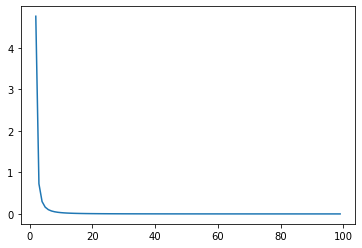

In [6]:
graph(mean_rectangles)

### Формула левых прямоугольников

In [7]:
def left_rectangles(k):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h*f(nodes[i])
    return J

In [8]:
left_rectangles(500)

7.253967872470877

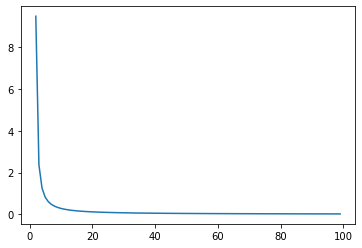

In [9]:
graph(left_rectangles)

### Формула трапеций

In [10]:
def trapezoid(k=50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h/2 * (f(nodes[i])+f(nodes[i+1]))
    return J

In [11]:
trapezoid(500)

7.25798277897152

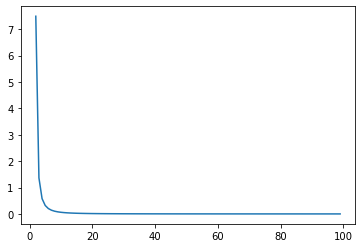

In [12]:
graph(trapezoid)

### Формула Симпсона

In [13]:
def simpson(k = 50):
    nodes = [a+(l-1)*(b-a)/(k-1) for l in range(1, k+1)]
    J = 0
    h = nodes[1] - nodes[0]
    for i in range(len(nodes)-1):
        J += h/6 * (f(nodes[i])+4*f((nodes[i]+nodes[i+1])/2)+f(nodes[i+1]))
    return J

In [14]:
simpson(500)

7.2580029843809655

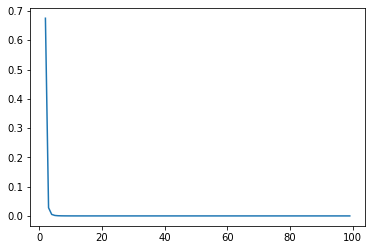

In [15]:
graph(simpson)

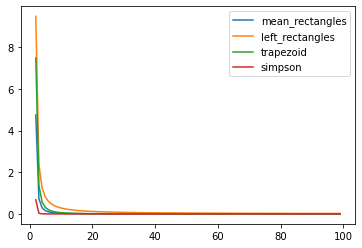

In [16]:
errors = []
for j in range(2, 100):
    errors.append(abs(mean_rectangles(j) - J_true))
plt.plot(range(2, 100), errors, label = 'mean_rectangles')
errors = []
for j in range(2, 100):
    errors.append(abs(left_rectangles(j) - J_true))
plt.plot(range(2, 100), errors, label = 'left_rectangles')
errors = []
for j in range(2, 100):
    errors.append(abs(trapezoid(j) - J_true))
plt.plot(range(2, 100), errors, label = 'trapezoid')
errors = []
for j in range(2, 100):
    errors.append(abs(simpson(j) - J_true))
plt.plot(range(2, 100), errors, label = 'simpson')
plt.legend()

## 1.2 Cоставные квадратурные формулы на базе 3-x-точечных формул Ньютона-Котса и Гаусса

In [17]:
def p(x):
    return (x-a)**(-alpha)*(b-x)**(-beta)
def F(x):
    return f(x)*p(x)
J2_true = 7.07703

### Формула Гаусса

In [18]:
# для решения СЛАУ понадобится метод отражений.
def metod_otr(A, b):
    n = len(b)
    Q = np.eye(n)
    R = np.copy(A)
    for i in range(n-1):
        # строим w
        y = [0]*(n-i)  # n-i-й столбец матрицы R
        for j in range(i, n):
            y[j-i]=R[j][i]
        z = np.zeros(n-i)
        z[0] = 1  # z - орт е1
        alpha1 = np.linalg.norm(y)
        w = (y-alpha1*z)
        if np.linalg.norm(w) != 0:
            w /= np.linalg.norm(y-alpha1*z)
        # строим Q, R
        W = np.eye(n-i)  # W= w*wT - матрица
        for j in range(n-i):
            for k in range(n-i):
                W[j][k] = w[j]*w[k]
        Q_small = np.eye(n-i)-2*W
        R_small = np.zeros((n-i, n-i))
        for j in range(i, n):
            for k in range(i, n):
                R_small[j-i][k-i] = R[j][k]  
        R_small = np.dot(Q_small,R_small)
        # Q new, размера nxn
        Q_new = np.eye(n)
        if (i==0):
            R = np.eye(n)
        for j in range(i, n):
            for k in range(i, n):
                Q_new[j][k] = Q_small[j-i][k-i]
                R[j][k] = R_small[j-i][k-i]           
        Q = np.dot(Q, Q_new)
    # обратный ход
    y = np.dot(np.transpose(Q),b)
    x = np.copy(y)
    for i in range(n-1, -1, -1):
        for j in range(n-2, i-1, -1):
            x[i] -= x[j+1]*R[i][j+1]
        x[i]/=R[i][i]
    return x

In [19]:
def Gauss(n):
    h = (b - a)/n
    res = 0
    for i in range(n):
        x1 = a + i*h
        x2 = x1 + h
        # вычислим моменты
        mu_0 = ((x2 - a)**(1 - alpha) - (x1 - a)**(1 - alpha)) / (1 - alpha)
        mu_1 = ((x2 - a)**(2 - alpha) - (x1 - a)**(2 - alpha))/ (2 - alpha) + a*mu_0
        mu_2 = ((x2 - a)**(3 - alpha) - (x1 - a)**(3 - alpha)) / (3 - alpha) + 2*a*mu_1 - a**2*mu_0
        mu_3 = ((x2 - a)**(4 - alpha) - (x1 - a)**(4 - alpha)) / (4 - alpha) + 3*a*mu_2 - 3*a**2*mu_1 + a**3*mu_0
        mu_4 = ((x2 - a)**(5 - alpha) - (x1 - a)**(5 - alpha)) / (5 - alpha) + 4*a*mu_3 - 6*a**2*mu_2 + 4*a**3*mu_1 - a**4*mu_0
        mu_5 = ((x2 - a)**(6 - alpha) - (x1 - a)**(6 - alpha)) / (6 - alpha) + 5*a*mu_4 - 10*a**2*mu_3 + 10*a**3*mu_2 - 5*a**4*mu_1 + a**5*mu_0
        mu = [mu_0, mu_1, mu_2, mu_3, mu_4, mu_5]
        # решим СЛАУ A_*A = mu_
        A_ = [[mu_0, mu_1, mu_2], [mu_1, mu_2, mu_3], [mu_2, mu_3, mu_4]]
        mu_ = [-mu_3, -mu_4, -mu_5]
        A = metod_otr(A_, mu_)
        # определим узловой многочлен, вычислим его корни по формуле Кардано
        def w(x):
            return x**3 + A[2]*x**2 + A[1]*x + A[0]
        a_ = 1
        b_ = A[2] 
        c_ = A[1]
        d_ = A[0]
        p = (3*a_*c_ - b_**2)/(3*a_**2)
        q = (2*b_**3 - 9*a_*b_*c_ + 27*a_**2*d_)/(27*a_**3)
        Q = (p/3)**3 + (q/2)**2
        # Q<0 => три вещественных корня
        if Q < 0:
            alpha_ = (-q/2 + sqrt(Q)*pi)
            beta_ = (-q/2 - sqrt(Q)*pi)
            y1 = alpha_ + beta_ - b_/3
            y2 = -(alpha_ + beta_)/2 + 1j*(alpha_ - beta_)/2*sqrt(3) - b_/3
            y3 = -(alpha_ + beta_)/2 - 1j*(alpha_ - beta_)/2*sqrt(3) - b_/3
            # 
        x = [y1.real, y2.real, y3.real]
        X = [[1]*3, x, [xi**2 for xi in x]]
        mu = [mu_0, mu_1, mu_2]
        Aj = metod_otr(X, mu)
        for i in range(3):
            res += f(x[i])*Aj[i]
    return res

In [20]:
Gauss(100)

7.077026556711644

In [21]:
def graph2(method):
    errors = []
    for j in range(2, 100):
        errors.append(abs(method(j) - J2_true))
    plt.plot(range(2, 100), errors)

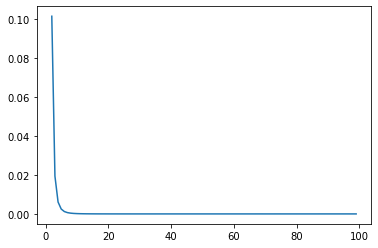

In [22]:
graph2(Gauss)

## Формула Ньютона-Котса

In [23]:
def Newton_Cotes(n):
    h = (b - a) / n
    res = 0
    for i in range(n):
        z1 = a + i*h
        z2 = z1 + h
        z12 = (z1 + z2)/2
        
        mu0 = (pow((z2 - a), 1 - alpha) - pow((z1 - a), 1 - alpha)) / (1 - alpha);
        mu1 = (pow((z2 - a), 2 - alpha) - pow((z1 - a), 2 - alpha)) / (2 - alpha) + a*mu0;
        mu2 = (pow((z2 - a), 3 - alpha) - pow((z1 - a), 3 - alpha)) / (3 - alpha) + 2*a*mu1 - a*a*mu0;

        A1 = (mu2 - mu1*(z12 + z2) + mu0*z12*z2) / ((z12 - z1)*(z2 - z1));
        A2 = -(mu2 - mu1*(z1 + z2) + mu0*z1*z2) / ((z12 - z1)*(z2 - z12));
        A3 = (mu2 - mu1*(z12 + z1) + mu0*z12*z1) / ((z2 - z12)*(z2 - z1));
        res += A1*f(z1) + A2*f(z12) + A3*f(z2);
    return res

In [24]:
Newton_Cotes(300)

7.07703143850155

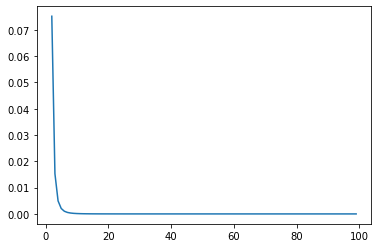

In [25]:
graph2(Newton_Cotes)

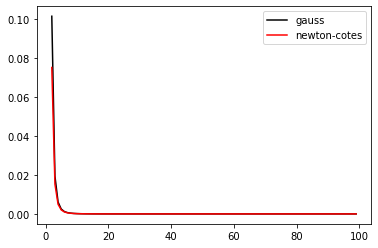

In [26]:
errors_gauss = []
for j in range(2, 100):
    errors_gauss.append(abs(Gauss(j) - J2_true))
errors_newt = []
for j in range(2, 100):
    errors_newt.append(abs(Newton_Cotes(j) - J2_true))
plt.plot(range(2, 100), errors_gauss, 'k', label = 'gauss')
plt.plot(range(2, 100), errors_newt, 'r', label = 'newton-cotes')
plt.legend()

# 2: Методы оценки погрешности составных квадратурных формул

## 2.1 
Вычислить определенный интеграл с заданной точностью 𝜀 = 10−6 c использованием 
составной 3-х-точечной квадратурной формулы Ньютона-Кот(е)са. Погрешность 
оценивать методом Ричардсона. На каждых последовательных трех точках оценивать 
скорость сходимости по правилу Эйткена. Указать длину шага ℎ разбиения интервала 
интегрирования, при котором была достигнута требуемая точность 𝜀.

In [27]:
def Runge(method):
    eps = 10**(-6)
    h1 = h
    L=2
    h2 = h/L
    S_h2 = method((b-a)/h2)
    S_h1 = method((b-a)/h1)
    R_h1 = (S_h2 - S_h1)/(1-L**(-m))
    R_h1 = (S_h2 - S_h1)/(L**(m)-1)
    h_opt = h*(eps*(1-L**(-m))/abs(S_h2 - S_h1))**(1/m)
    print('h_opt=')
    return h_opt

In [28]:
def Richardson(method):
    Rh = 1
    r = 0
    h = b - a
    eps = 10**(-6)
    h1 = h
    h2 = h1/2
    h3 = h2/2
    m = - log((method(h3) - method(h2)) / (method(h2) - method(h1)))/log(2)
    while Rh>eps:
        r+=1
        